In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [56]:
df = pd.read_csv('troop_movements.csv')
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-05-21 11:50:49,1,at-st,resistance,6,10,7,4,Zolan
1,2024-05-21 11:50:48,2,at-at,empire,10,1,10,5,Iktotch
2,2024-05-21 11:50:47,3,at-st,resistance,7,10,7,6,Concord Dawn
3,2024-05-21 11:50:46,4,stormtrooper,empire,2,7,9,6,Alderaan
4,2024-05-21 11:50:45,5,x-wing,resistance,10,5,8,6,Kashyyyk


In [57]:
# Create grouped data showing counts of empire vs resistance.
df_empire_or_resistance = df.groupby('empire_or_resistance').size()
df_empire_or_resistance = pd.DataFrame(df_empire_or_resistance, columns=["count"])
df_empire_or_resistance

,count
empire_or_resistance,
empire,508
resistance,492


In [58]:
df_homeworld = df.groupby(['homeworld']).size()
df_homeworld = pd.DataFrame(df_homeworld, columns=["count"])
df_homeworld

,count
homeworld,
Alderaan,17
Aleen Minor,29
Bestine IV,23
Cerea,19
Champala,20
Chandrila,19
Concord Dawn,20
Corellia,17
Dagobah,27


In [59]:
df_unit_type = df.groupby('unit_type').size()
df_unit_type = pd.DataFrame(df_unit_type, columns=["count"])
df_unit_type

,count
unit_type,
at-at,142
at-st,137
resistance_soldier,122
stormtrooper,127
tie_fighter,129
tie_silencer,123
unknown,119
x-wing,101


In [60]:
df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: True if x == "resistance" else False)
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-05-21 11:50:49,1,at-st,resistance,6,10,7,4,Zolan,True
1,2024-05-21 11:50:48,2,at-at,empire,10,1,10,5,Iktotch,False
2,2024-05-21 11:50:47,3,at-st,resistance,7,10,7,6,Concord Dawn,True
3,2024-05-21 11:50:46,4,stormtrooper,empire,2,7,9,6,Alderaan,False
4,2024-05-21 11:50:45,5,x-wing,resistance,10,5,8,6,Kashyyyk,True


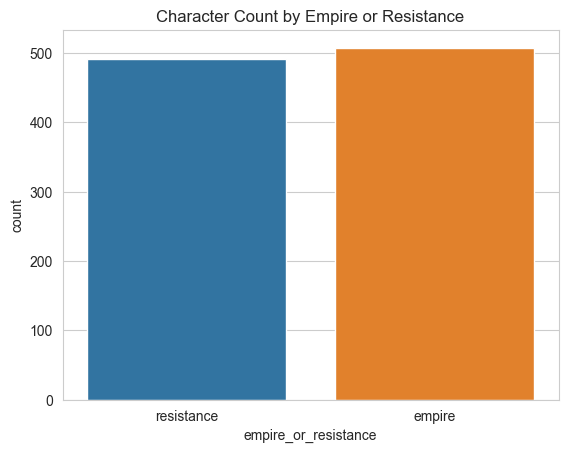

In [61]:
# sns.barplot(x="empire_or_resistance", y="count", data=df_empire_or_resistance)
sns.countplot(x="empire_or_resistance", hue="empire_or_resistance", data=df)
plt.title("Character Count by Empire or Resistance")
plt.show()

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
X = df[['homeworld','unit_type']]
y = df['is_resistance']
X_encoded = pd.get_dummies(X)
X_encoded

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
996,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
997,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.475


In [66]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
feature_importances_sorted = feature_importances.sort_values(by="Importance", ascending=False)

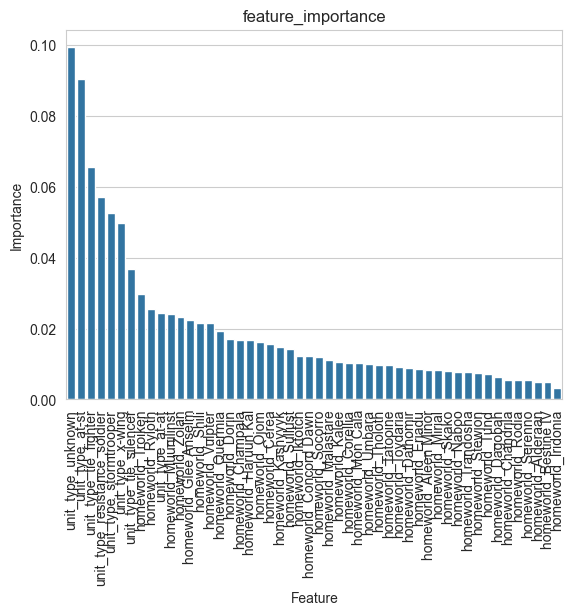

In [67]:
sns.barplot(x = 'Feature', y = 'Importance', data = feature_importances_sorted)
plt.title('feature_importance')
plt.xticks(rotation=90)
plt.show()

In [68]:
import pickle 
filename = "trained_model.pkl"
with open(filename, "wb") as file: # write binary
 pickle.dump(model, file) # model is dumped into the file